In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression

In [2]:
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
scalar=StandardScaler()
df[['total_bill','tip']]=scalar.fit_transform(df[['total_bill','tip']])

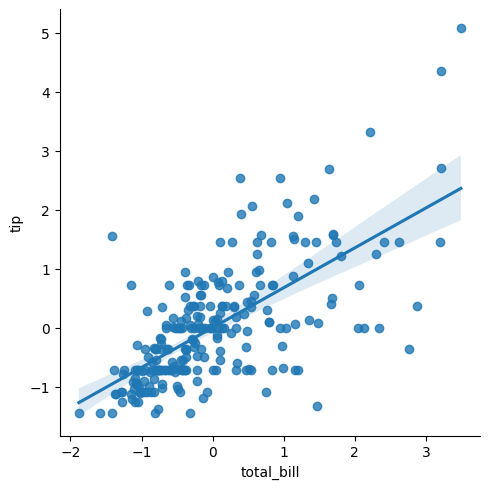

In [4]:
sns.lmplot(x='total_bill',y='tip',data=df)

In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,-0.314711,-1.439947,Female,No,Sun,Dinner,2
1,-1.063235,-0.969205,Male,No,Sun,Dinner,3
2,0.137780,0.363356,Male,No,Sun,Dinner,3
3,0.438315,0.225754,Male,No,Sun,Dinner,2
4,0.540745,0.443020,Female,No,Sun,Dinner,4


In [6]:
X=df[['total_bill']]
Y=df[['tip']]

In [7]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [8]:
model=LinearRegression()

In [9]:
model.fit(X_train,Y_train)

LinearRegression()

In [11]:
model.predict([[15]])

e:\PythonImp\anaconda\envs\python_ml\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[10.35454829]])

In [12]:
y_pred=model.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('MSE:',mean_squared_error(Y_test,y_pred))
print('MAE:',mean_absolute_error(Y_test,y_pred))
print('R2:',r2_score(Y_test,y_pred))
print('Coefficients:',model.coef_)


MSE: 0.2983382530785567
MAE: 0.4496364577054319
R2: 0.5449381659234667
Coefficients: [[0.68821097]]


In [14]:
import pickle

import os
if not os.path.exists('saved_model'):
    os.makedirs('saved_model')
pickle.dump(model,open('saved_model/model.pkl','wb'))

In [15]:
import pickle
model_load=pickle.load(open('saved_model/model.pkl','rb'))

In [16]:
model_load.predict([[15]])

e:\PythonImp\anaconda\envs\python_ml\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[10.35454829]])